In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,day,agent,team_leader,supervisor,total_chats,avg_response_time,csat,active_agents,escalations,resolved,pending,avg_chat_duration,sales_conversion,avg_queue_time
0,2025-10-15,John,Hassan,Omar,13,119.273664,0.940686,8,4,0.698060,6,5.889008,0.439562,116.261834
1,2025-10-15,Sarah,Hassan,Nour,39,81.221410,0.740730,4,3,0.795502,7,11.046841,0.185959,82.413391
2,2025-10-15,Ali,Hassan,Nour,36,158.959777,0.866523,7,2,0.994727,2,4.954789,0.314977,105.222265
3,2025-10-15,Mona,Amira,Omar,21,141.503642,0.813411,3,4,0.623600,6,7.206315,0.279645,113.755212
4,2025-10-14,John,Amira,Omar,21,285.300450,0.856765,9,4,0.635401,0,7.841283,0.139760,28.223172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2025-09-17,Mona,Hassan,Omar,35,199.210630,0.838548,6,3,0.650832,2,14.018325,0.147248,91.018547
116,2025-09-16,John,Hassan,Nour,10,44.929461,0.778760,9,0,0.829520,8,8.153614,0.289128,59.174501
117,2025-09-16,Sarah,Hassan,Nour,28,100.742678,0.960624,6,2,0.689606,3,4.814898,0.417023,64.389131
118,2025-09-16,Ali,Amira,Omar,33,211.472135,0.944772,8,2,0.601063,6,3.997529,0.006333,104.449496


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_avg_chat_duration(
    df,
    agent=None,
    team_leader=None,
    supervisor=None,
    start_date=None,
    end_date=None
):
    """
    Filter dataset by agent/team_leader/supervisor and optional date range,
    then plot smooth filled line for average chat duration.
    """

    df = df.copy()
    df["day"] = pd.to_datetime(df["day"])

    # Apply filters only if not None and not "All"
    if agent and agent.lower() != "all":
        df = df[df["agent"] == agent]
    if team_leader and team_leader.lower() != "all":
        df = df[df["team_leader"] == team_leader]
    if supervisor and supervisor.lower() != "all":
        df = df[df["supervisor"] == supervisor]

    # Apply date range
    if start_date:
        df = df[df["day"] >= pd.to_datetime(start_date)]
    if end_date:
        df = df[df["day"] <= pd.to_datetime(end_date)]

    if df.empty:
        print("⚠️ No data found for the given filters.")
        return

    # Group and average by day
    daily_avg = df.groupby("day")["avg_chat_duration"].mean().reset_index()

    # Sort by date
    daily_avg = daily_avg.sort_values("day")

    # Make smooth curve using interpolation
    x = np.arange(len(daily_avg))
    y = daily_avg["avg_chat_duration"].values

    plt.figure(figsize=(10, 5))

    # Plot smooth line
    plt.plot(
        daily_avg["day"], y,
        color="#FFD700",               # gold/yellow
        linewidth=2.5,
        marker="o",
        markerfacecolor="white",
        markeredgecolor="#FFD700",
        markersize=6,
        label="Average Chat Duration"
    )

    # Fill area under line
    plt.fill_between(
        daily_avg["day"], y, color="#FFD700", alpha=0.2
    )

    # Title
    title_filters = []
    if agent and agent.lower() != "all":
        title_filters.append(f"Agent: {agent}")
    if team_leader and team_leader.lower() != "all":
        title_filters.append(f"Leader: {team_leader}")
    if supervisor and supervisor.lower() != "all":
        title_filters.append(f"Supervisor: {supervisor}")
    if start_date or end_date:
        title_filters.append(f"{start_date or ''} → {end_date or ''}")
    title_text = " | ".join(title_filters) if title_filters else "All Data"

    plt.title(f"Average Chat Duration Over Time\n{title_text}", fontsize=14, weight="bold")
    plt.xlabel("Day", fontsize=12)
    plt.ylabel("Average Chat Duration (minutes)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(frameon=False)
    plt.show()

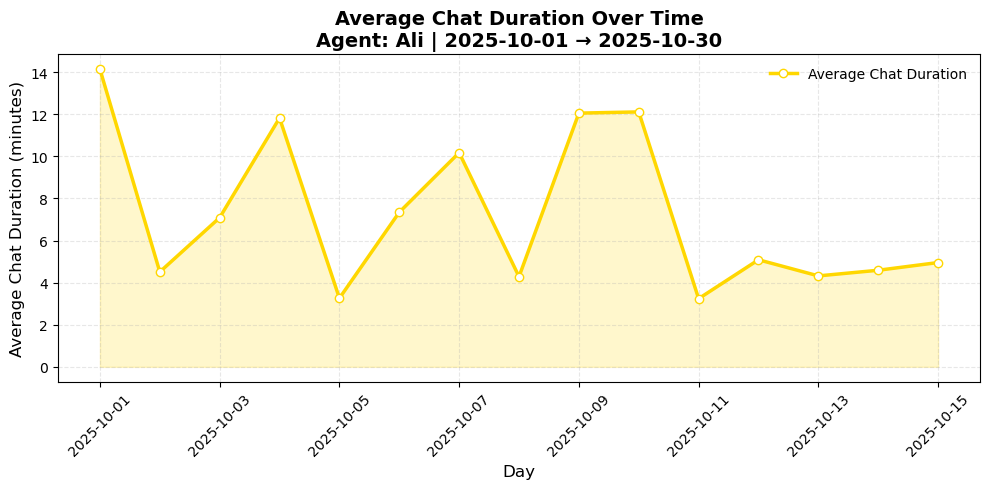

In [24]:
plot_avg_chat_duration(
    data,
    agent="Ali",
    team_leader="All",
    supervisor="All",
    start_date="2025-10-01",
    end_date="2025-10-30"
)